<a href="https://colab.research.google.com/github/RohanBolle/BigCrunch/blob/main/G_star_Friedmann_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SET UP


In [9]:
import numpy as np
import scipy as sp
from sympy import lambdify
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.special import expi
from sympy.printing.latex import latex

In [10]:
H_0 = 1/13.8        # Hubble const
t_i = 0.01       # initial start time of universe
t_f = 0.5           # final time of examining the universe
y_i = 0.0001       # start scale factor of universe
w = 0.05        # controls how quickly tanh goes from -1 to 1
G_0 = 1
r_0 = 1
c = 3*(10**9)
r_vals = np.linspace(0.1, 10, 500)
a_0 = 0.0001

In [11]:
# def func_0(r):
#   return G_0*np.exp(-r/r_0)/r_0

# def func_1(r):
#   return (2*r**(2)*np.exp(2*r)*expi(-2*r)+2*r+1)*np.exp(-2*r)

# def func_2(r):
#   return 2*r**(3)*expi(-2*r)-2*r**(2)*np.exp2(2*r)+ (r+1)**(2)*np.exp(-2*r)

In [12]:
# Omega_0_m = 1  # normalized mass density
# omega_r = 0
# omega_lambda = 0
# omega_0 = omega_lambda + omega_r + Omega_0_m


# #Friedmann with all G stars
# sol_1 = solve_ivp(lambda t, r: r*H_0*(omega_0*(func_0(r))/((r**3)*G_0)+ (omega_0**2*((H_0)**2)*(func_1(r))**2)/(G_0*r**6*(2*c**2)) + (omega_0 * (func_2(r))**2)/(G_0* c**3 * r**3))**0.5, [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000), method='RK45', rtol = 1e-5)

# # sol_2 = solve_ivp(lambda t, r: H_0*(omega_0*(func_0(r))/((r**2)*G_0))**0.5, [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000), method='RK45', rtol = 1e-5)

# # Original Friedmann
# sol_ori = solve_ivp(lambda t, r: r*H_0*(Omega_0_m/(r**3) + (1-Omega_0_m)/(r**2) + omega_r/(r**4) + omega_lambda)**0.5, [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000), method='LSODA', rtol = 1e-5)

# # print(sol_1.y[0])
# # print(sol_2.y[0])

# plt.plot(sol_1.t, sol_1.y[0],  "--", color ='red', label ='G_stars')
# plt.plot(sol_ori.t, sol_ori.y[0],  "-.", color ='blue', label ='Standard Friedmann')                # modified friedmann equation
# plt.xlabel("Time (t)")
# plt.ylabel("Scale factor (a)")
# plt.legend()
# plt.show()



---



---



#START HERE -----------------  FRIEDMANN RESULTS

1) \begin{equation} G_{0} a^{B}\end{equation}

In [13]:

# # Define the new functions
# def func_0(r, B):
#   return B * G_0 * r * (r**B / (B * r - r)) + G_0 * r**B

# def func_1(r, B):
#   return B * G_0**2 * r**2 * (r**(2*B) / (2 * B * r**2 - 2 * r**2)) + G_0**2 * r**(2*B)

# def func_2(r, B):
#   return 2 * B * G_0**2 * r**3 * (r**(2*B) / (2 * B * r**3 - 3 * r**3)) + G_0**2 * r**(2*B)

/tmp/ipython-input-14-4028340371.py:45: RuntimeWarning: invalid value encountered in sqrt
  lambda t, r: r * H_0 * (


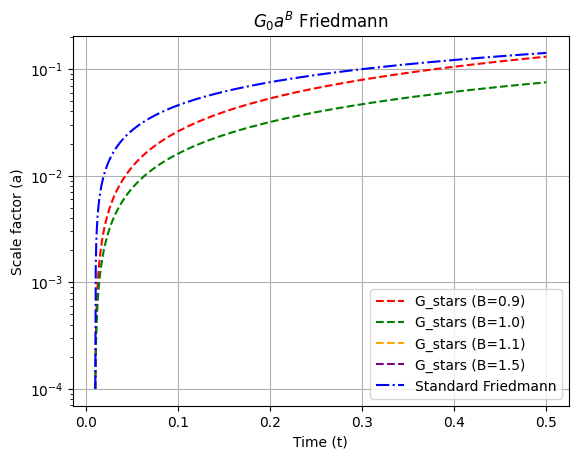

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G_0 = 1
H_0 = 1 / 13.8  # Hubble constant
c = 3e9
Omega_0_m = 1  # normalized mass density
omega_r = 0
omega_lambda = 0
omega_0 = omega_lambda + omega_r + Omega_0_m

# Time settings
t_i = 0.01
t_f = 0.5
y_i = 0.0001
r_vals = np.linspace(0.1, 10, 500)

# G_star functions with proper piecewise logic
def func_0(r, B):
    if np.isclose(B, 1):
        return -B * G_0 * r * np.log(r) + G_0 * r**B
    else:
        return -B * G_0 * r * (r**B / (B * r - r)) + G_0 * r**B

def func_1(r, B):
    if np.isclose(B, 1):
        return B * G_0**2 * r**2 * np.log(r) + G_0**2 * r**(2*B)
    else:
        return B * G_0**2 * r**2 * (r**(2*B) / (2 * B * r**2 - 2 * r**2)) + G_0**2 * r**(2*B)

def func_2(r, B):
    if np.isclose(B, 1.5):
        return 2 * B * G_0**2 * r**3 * np.log(r) + G_0**2 * r**(2*B)
    else:
        return 2 * B * G_0**2 * r**3 * (r**(2*B) / (2 * B * r**3 - 3 * r**3)) + G_0**2 * r**(2*B)

# Solve and plot for multiple B values
B_vals = [0.9, 1.0, 1.1, 1.5]
colors = ['red', 'green', 'orange', 'purple']

for i, B in enumerate(B_vals):
    sol_1 = solve_ivp(
        lambda t, r: r * H_0 * (
            (omega_0 * func_0(r, B)) / (r**3 * G_0) +
            (omega_0**2 * H_0**2 * func_1(r, B)**2) / (G_0 * r**6 * 2 * c**2) +
            (omega_0 * func_2(r, B)**2) / (G_0 * c**3 * r**3)
        )**0.5,
        [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),
        method='LSODA', rtol=1e-5
    )
    plt.plot(sol_1.t, sol_1.y[0], '--', label=f'G_stars (B={B})', color=colors[i])

# Solve standard Friedmann equation
sol_ori = solve_ivp(
    lambda t, r: r * H_0 * (
        Omega_0_m / r**3 + (1 - Omega_0_m) / r**2 + omega_r / r**4 + omega_lambda)**0.5,
    [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),
    method='LSODA', rtol=1e-5
)

plt.plot(sol_ori.t, sol_ori.y[0], '-.', color='blue', label='Standard Friedmann')
plt.xlabel("Time (t)")
plt.ylabel("Scale factor (a)")
plt.yscale('log')  # Optional: log scale for clarity
plt.title("$G_{0}a^{B}$ Friedmann")
plt.legend()
plt.grid(True)
plt.show()


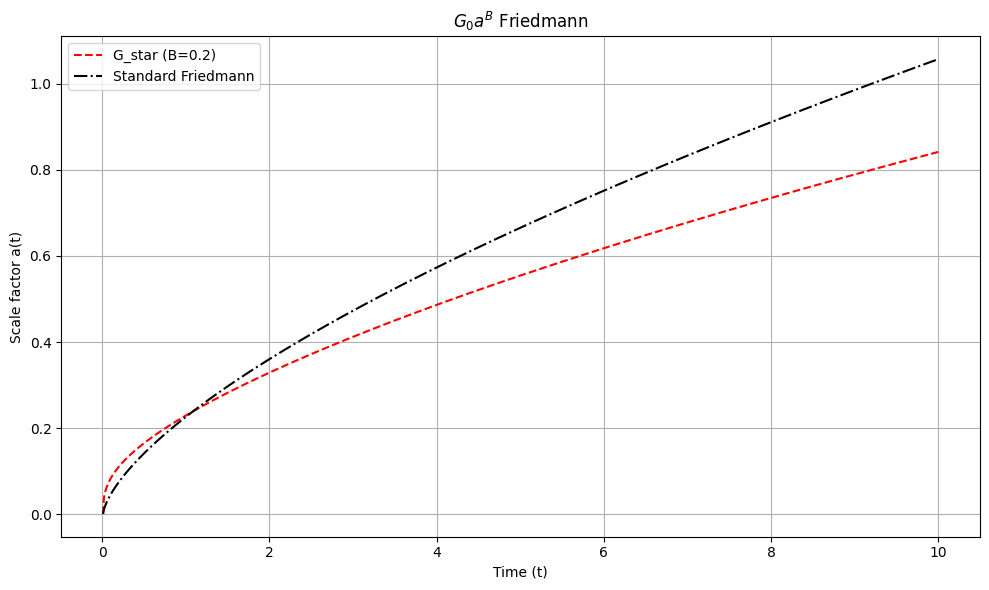

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G_0 = 1
H_0 = 1/13.8
c = 1
B_vals = [0.2]
l = 1
z = 1

Omega_0_m = 1 # normalized mass density
omega_r = 0
omega_lambda = 0
omega_0 = omega_lambda + omega_r + Omega_0_m

# Time and initial conditions
t_i = 0.01
t_f = 10.0           # Extended time for visible growth
y_i = 0.001          # Higher initial scale factor

# Define G_star functions (piecewise logic)
def func1_0(r, B):
    if np.isclose(B, 1):
        return -B * G_0 * r * np.log(r) + G_0 * r**B
    else:
        return -B * G_0 * r * (r**B / (B * r - r)) + G_0 * r**B

def func1_1(r, B):
    if np.isclose(B, 1):
        return B * G_0**2 * r**2 * np.log(r) + G_0**2 * r**(2*B)
    else:
        return B * G_0**2 * r**2 * (r**(2*B) / (2 * B * r**2 - 2 * r**2)) + G_0**2 * r**(2*B)

def func1_2(r, B):
    if np.isclose(B, 1.5):
        return 2 * B * G_0**2 * r**3 * np.log(r) + G_0**2 * r**(2*B)
    else:
        return 2 * B * G_0**2 * r**3 * (r**(2*B) / (2 * B * r**3 - 3 * r**3)) + G_0**2 * r**(2*B)

# Plot multiple B values

colors = ['red', 'green', 'orange', 'purple', 'blue', 'cyan']
plt.figure(figsize=(10, 6))

for i, B in enumerate(B_vals):
    sol_1 = solve_ivp(
        lambda t, r: r * H_0 * (
            (omega_0 * func1_0(r, B)) / (r**3 * G_0) +
             (l * omega_0**2 * H_0**2 * func1_1(r, B)) / (G_0**2 * r**6 * 2 * c**2) -
             (z * omega_0 * func1_2(r, B)) / (G_0 * c**3 * r**3))**0.5,
             [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),method='RK45', rtol=1e-5)
    plt.plot(sol_1.t, sol_1.y[0], '--', color=colors[i], label=f'G_star (B={B})')

# Solve standard Friedmann equation
sol_ori = solve_ivp(
    lambda t, r: r * H_0 * (
        Omega_0_m / r**3 + (1 - Omega_0_m) / r**2 + omega_r / r**4 + omega_lambda)**0.5,
    [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),
    method='RK45', rtol=1e-5
)

# Plot standard Friedmann
plt.plot(sol_ori.t, sol_ori.y[0], '-.', color='black', label='Standard Friedmann')

# Labels and formatting
plt.xlabel("Time (t)")
plt.ylabel("Scale factor a(t)")
plt.title("$G_{0}a^{B}$ Friedmann")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('friedmann func_1.png')
plt.show()


# # 🔍 Optional: Relative Difference Plot
#     sol_1 = solve_ivp(
#         lambda t, r: r * H_0 * (
#             (omega_0 * func_0(r, B)) / (r**3 * G_0) +
#             (omega_0**2 * H_0**2 * func_1(r, B)**2) / (G_0 * r**6 * 2 * c**2) +
#             (omega_0 * func_2(r, B)**2) / (G_0 * c**3 * r**3)
#         )**0.5,
#         [t_i, t_f], [y_i], t_eval=sol_ori.t,
#         method='LSODA', rtol=1e-5
#     )
#     rel_diff = (sol_1.y[0] - sol_ori.y[0]) / sol_ori.y[0]
#     plt.plot(sol_ori.t, rel_diff, label=f'Relative Δ (B={B})', color=colors[i])

# plt.axhline(0, linestyle='--', color='gray')
# plt.xlabel("Time (t)")
# # plt.ylabel("Relative Difference")
# plt.title("Relative Difference: G_star vs Standard")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()



---



---



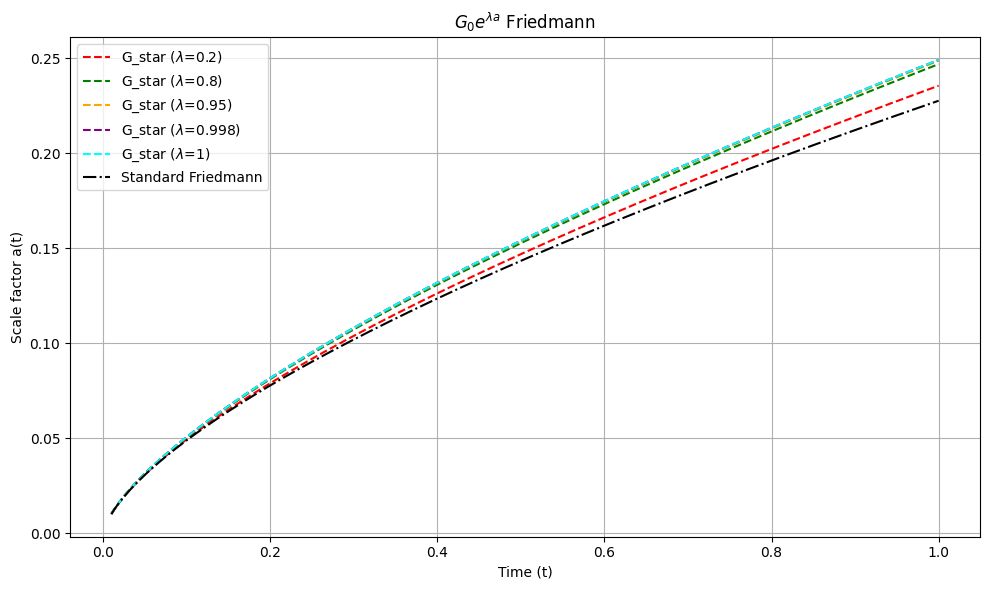

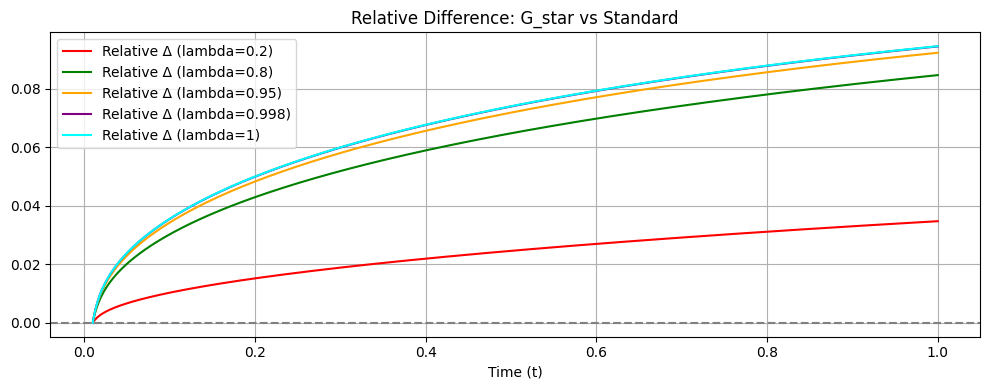

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import expi  # for the exponential integral Ei(x)

# Constants
G_0 = 1
H_0 = 1 / 13.8
c = 3e9
Omega_0_m = 1
omega_r = 0
omega_lambda = 0
omega_0 = omega_lambda + omega_r + Omega_0_m

# Time and initial conditions
t_i = 0.01
t_f = 1.0
y_i = 0.01

# Define G_star functions

def func_0(r, lam):  # G_star
    return -G_0 * lam * r * expi(lam * r) + G_0 * np.exp(lam * r)

def func_1(r, lam):  # G1_star
    term1 = -G_0**2 * lam * r**2 * (2 * lam * expi(2 * lam * r) - np.exp(2 * lam * r) / r)
    term2 = G_0**2 * np.exp(2 * lam * r)
    return term1 + term2

def func_2(r, lam):  # G2_star
    term1 = -2 * G_0**2 * lam * r**3
    bracket = 2 * lam**2 * expi(2 * lam * r) - (lam * np.exp(2 * lam * r)) / r - (np.exp(2 * lam * r)) / (2 * r**2)
    term2 = G_0**2 * np.exp(2 * lam * r)
    return term1 * bracket + term2

# Plot multiple B values
lam_vals = [ 0.2, 0.8, 0.95, 0.998, 1]
colors = ['red', 'green', 'orange', 'purple', 'cyan', 'blue']
plt.figure(figsize=(10, 6))

for i, lam in enumerate(lam_vals):
    sol_1 = solve_ivp(
        lambda t, r: r * H_0 * (
            (omega_0 * func_0(r, lam)) / (r**3 * G_0) +
            (omega_0**2 * H_0**2 * func_1(r, lam)**2) / (G_0 * r**6 * 2 * c**2) +
            (omega_0 * func_2(r, lam)**2) / (G_0 * c**3 * r**3)
        )**0.5,
        [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),
        method='LSODA', rtol=1e-5
    )
    plt.plot(sol_1.t, sol_1.y[0], '--', color=colors[i], label=f'G_star ($\lambda$={lam})')

# Solve standard Friedmann equation
sol_ori = solve_ivp(
    lambda t, r: r * H_0 * (
        Omega_0_m / r**3 + (1 - Omega_0_m) / r**2 + omega_r / r**4 + omega_lambda)**0.5,
    [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),
    method='LSODA', rtol=1e-5
)

# Plot standard Friedmann
plt.plot(sol_ori.t, sol_ori.y[0], '-.', color='black', label='Standard Friedmann')


plt.xlabel("Time (t)")
plt.ylabel("Scale factor a(t)")
# plt.yscale('log')  # Optional: use linear scale if preferred
plt.title("$G_{0}e^{\lambda a}$ Friedmann")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('friedmann func_2.png')
plt.show()

#Relative Difference Plot
plt.figure(figsize=(10, 4))
for i, lam in enumerate(lam_vals):
    sol_1 = solve_ivp(
        lambda t, r: r * H_0 * (
            (omega_0 * func_0(r, lam)) / (r**3 * G_0) +
            (omega_0**2 * H_0**2 * func_1(r, lam)**2) / (G_0 * r**6 * 2 * c**2) +
            (omega_0 * func_2(r, lam)**2) / (G_0 * c**3 * r**3)
        )**0.5,
        [t_i, t_f], [y_i], t_eval=sol_ori.t,
        method='LSODA', rtol=1e-5
    )
    rel_diff = (sol_1.y[0] - sol_ori.y[0]) / sol_ori.y[0]
    plt.plot(sol_ori.t, rel_diff, label=f'Relative Δ (lambda={lam})', color=colors[i])

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Time (t)")
# plt.ylabel("Relative Difference")
plt.title("Relative Difference: G_star vs Standard")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


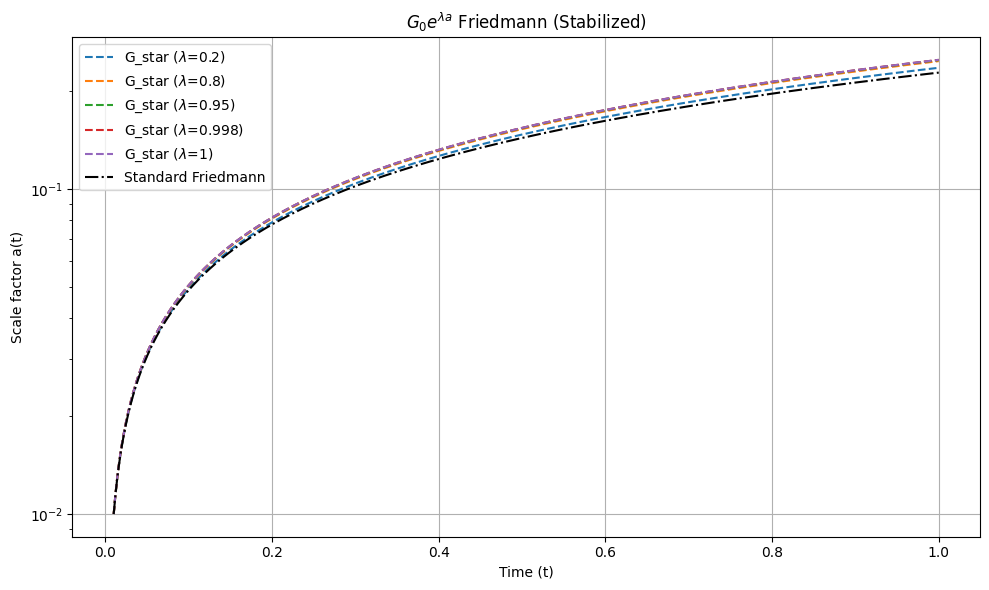

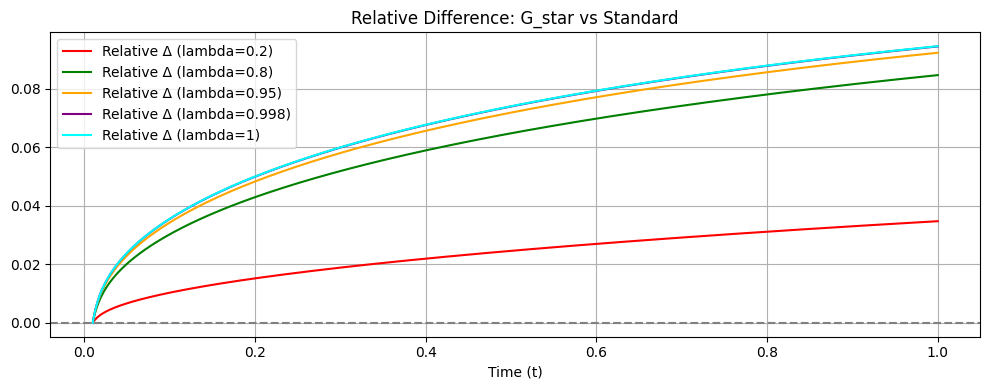

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import expi

# Constants
G_0 = 1
H_0 = 1 / 13.8
c = 3e9
Omega_0_m = 1
omega_r = 0
omega_lambda = 0
omega_0 = omega_lambda + omega_r + Omega_0_m

# Time and initial conditions
t_i = 0.01
t_f = 1.0
y_i = 0.01  # Slightly increased to avoid division near zero

# Define safe G_star functions with clamping
def func_0(r, lam):
    r = np.maximum(r, 1e-5)
    return -G_0 * lam * r * expi(lam * r) + G_0 * np.exp(lam * r)

def func_1(r, lam):
    r = np.maximum(r, 1e-5)
    term1 = -G_0**2 * lam * r**2 * (2 * lam * expi(2 * lam * r) - np.exp(2 * lam * r) / r)
    term2 = G_0**2 * np.exp(2 * lam * r)
    return term1 + term2

def func_2(r, lam):
    r = np.maximum(r, 1e-5)
    term1 = -2 * G_0**2 * lam * r**3
    bracket = 2 * lam**2 * expi(2 * lam * r) - (lam * np.exp(2 * lam * r)) / r - (np.exp(2 * lam * r)) / (2 * r**2)
    term2 = G_0**2 * np.exp(2 * lam * r)
    return term1 * bracket + term2

# Lambda values to test
lam_vals = [0.2, 0.8, 0.95, 0.998, 1]

# Set up plot
plt.figure(figsize=(10, 6))

# Solve and plot modified Friedmann for each lambda
for lam in lam_vals:
    try:
        sol = solve_ivp(
            lambda t, r: r * H_0 * (
                (omega_0 * func_0(r, lam)) / (r**3 * G_0) +
                (omega_0**2 * H_0**2 * func_1(r, lam)**2) / (G_0 * r**6 * 2 * c**2) +
                (omega_0 * func_2(r, lam)**2) / (G_0 * c**3 * r**3)
            )**0.5,
            [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),
            method='LSODA', rtol=1e-5
        )
        plt.plot(sol.t, sol.y[0].flatten(), '--', label=f'G_star ($\\lambda$={lam})')
    except Exception as e:
        print(f"Failed for lambda={lam}: {e}")

# Solve and plot standard Friedmann equation
sol_ori = solve_ivp(
    lambda t, r: r * H_0 * (
        Omega_0_m / r**3 + (1 - Omega_0_m) / r**2 + omega_r / r**4 + omega_lambda)**0.5,
    [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),
    method='LSODA', rtol=1e-5
)
plt.plot(sol_ori.t, sol_ori.y[0].flatten(), '-.', color='black', label='Standard Friedmann')

# Final plot settings
plt.xlabel("Time (t)")
plt.ylabel("Scale factor a(t)")
plt.yscale('log')
plt.title("$G_{0}e^{\\lambda a}$ Friedmann (Stabilized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Relative Difference Plot
plt.figure(figsize=(10, 4))
for i, lam in enumerate(lam_vals):
    sol_1 = solve_ivp(
        lambda t, r: r * H_0 * (
            (omega_0 * func_0(r, lam)) / (r**3 * G_0) +
            (omega_0**2 * H_0**2 * func_1(r, lam)**2) / (G_0 * r**6 * 2 * c**2) +
            (omega_0 * func_2(r, lam)**2) / (G_0 * c**3 * r**3)
        )**0.5,
        [t_i, t_f], [y_i], t_eval=sol_ori.t,
        method='LSODA', rtol=1e-5
    )
    rel_diff = (sol_1.y[0] - sol_ori.y[0]) / sol_ori.y[0]
    plt.plot(sol_ori.t, rel_diff, label=f'Relative Δ (lambda={lam})', color=colors[i])

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Time (t)")
# plt.ylabel("Relative Difference")
plt.title("Relative Difference: G_star vs Standard")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




---

---





/tmp/ipython-input-18-1356747806.py:44: RuntimeWarning: invalid value encountered in sqrt
  lambda t, r: r * H_0 * (


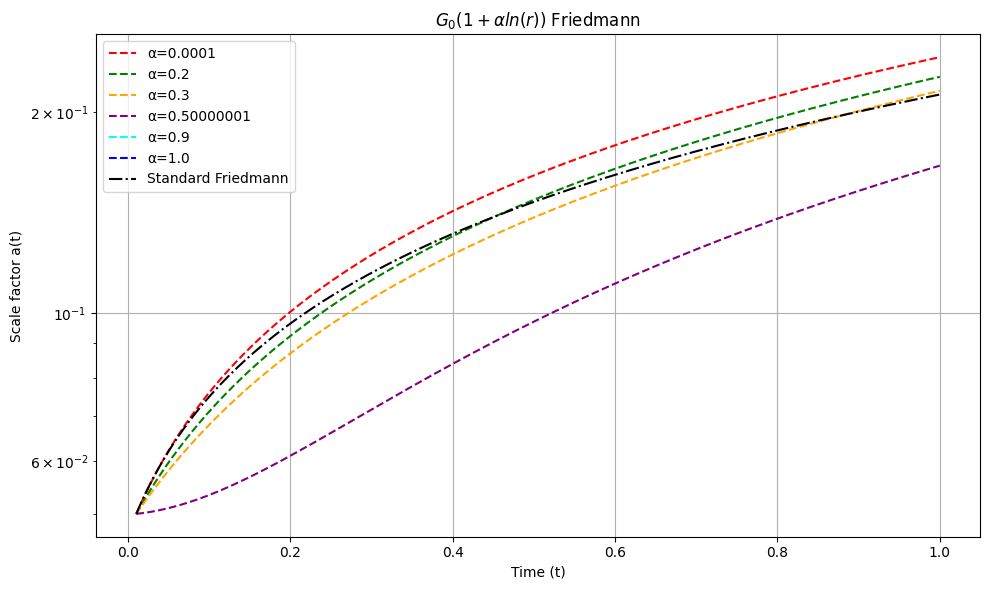

/tmp/ipython-input-18-1356747806.py:78: RuntimeWarning: invalid value encountered in sqrt
  lambda t, r: r * H_0 * (


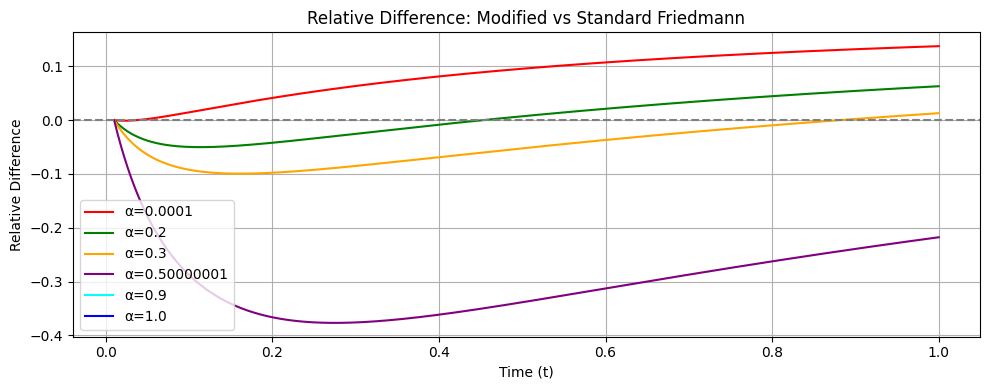

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G_0 = 1
H_0 = 1 / 13.8
c = 3e9
Omega_0_m = 0.22  # normalized mass density
omega_r = 0.04
omega_lambda = 0.74
omega_0 = omega_lambda + omega_r + Omega_0_m

# Time and initial conditions
t_i = 0.01
t_f = 1.0
y_i = 0.05

# New G_star functions from the latest image
def func_0(r, a):  # G_star
    return G_0 * a + G_0 * (a * np.log(r) + 1)

def func_1(r, a):  # G1_star
    term1 = G_0**2 * (a * np.log(r) + 1)**2
    bracket = (G_0**2 * a**2 * np.log(r)) / (2 * r**2) - (G_0**2 * a**2) / (4 * r**2) + (G_0**2 * a) / (2 * r**2)
    term2 = r**2 * bracket
    return term1 - term2

def func_2(r, a):  # G2_star
    term1 = G_0**2 * (a * np.log(r) + 1)**2
    bracket = (G_0**2 * a**2 * np.log(r)) / (3 * r**3) - (G_0**2 * a**2) / (9 * r**3) + (G_0**2 * a) / (3 * r**3)
    term2 = 2 * r**3 * bracket
    return term1 - term2

# Alpha values to test
a_vals = [0.0001, 0.2, 0.3, 0.50000001, 0.9, 1.0]
colors = ['red', 'green', 'orange', 'purple', 'cyan', 'blue']

plt.figure(figsize=(10, 6))

# Solve modified Friedmann for each alpha
for i, alpha in enumerate(a_vals):
    sol = solve_ivp(
        lambda t, r: r * H_0 * (
            (omega_0 * func_0(r, alpha)) / (r**3 * G_0) +
            (omega_0**2 * H_0**2 * func_1(r, alpha)**2) / (G_0 * r**6 * 2 * c**2) +
            (omega_0 * func_2(r, alpha)**2) / (G_0 * c**3 * r**3)
        )**0.5,
        [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),
        method='LSODA', rtol=1e-5
    )
    plt.plot(sol.t, sol.y[0], '--', label=f'α={alpha}', color=colors[i])

# Standard Friedmann solution
sol_std = solve_ivp(
    lambda t, r: r * H_0 * (
        Omega_0_m / r**3 + (1 - Omega_0_m) / r**2 + omega_r / r**4 + omega_lambda
    )**0.5,
    [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),
    method='LSODA', rtol=1e-5
)
plt.plot(sol_std.t, sol_std.y[0], '-.', color='black', label='Standard Friedmann')

plt.xlabel("Time (t)")
plt.ylabel("Scale factor a(t)")
plt.yscale('log')  # Optional: set to 'linear' if needed
plt.title("$G_{0}(1+α ln(r))$ Friedmann")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('friedmann func_3.png')
plt.show()

# Relative difference plot
plt.figure(figsize=(10, 4))
for i, alpha in enumerate(a_vals):
    sol = solve_ivp(
        lambda t, r: r * H_0 * (
            (omega_0 * func_0(r, alpha)) / (r**3 * G_0) +
            (omega_0**2 * H_0**2 * func_1(r, alpha)**2) / (G_0 * r**6 * 2 * c**2) +
            (omega_0 * func_2(r, alpha)**2) / (G_0 * c**3 * r**3)
        )**0.5,
        [t_i, t_f], [y_i], t_eval=sol_std.t,
        method='LSODA', rtol=1e-5
    )
    rel_diff = (sol.y[0] - sol_std.y[0]) / sol_std.y[0]
    plt.plot(sol_std.t, rel_diff, label=f'α={alpha}', color=colors[i])

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Time (t)")
plt.ylabel("Relative Difference")
plt.title("Relative Difference: Modified vs Standard Friedmann")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


⚠️ Skipping α=-0.2: Invalid sqrt expression for α=-0.2: [-3.74480307e-10]
⚠️ Skipping α=0.9: Invalid sqrt expression for α=0.9: [-9553.90855438]
⚠️ Skipping α=1.0: Invalid sqrt expression for α=1.0: [-11948.78728265]


/tmp/ipython-input-19-679453681.py:68: RuntimeWarning: invalid value encountered in sqrt
  lambda t, r: r * H_0 * (
/usr/local/lib/python3.11/dist-packages/scipy/integrate/_ivp/lsoda.py:161: UserWarning: lsoda: Excess accuracy requested (tolerances too small).
  solver._y, solver.t = integrator.run(


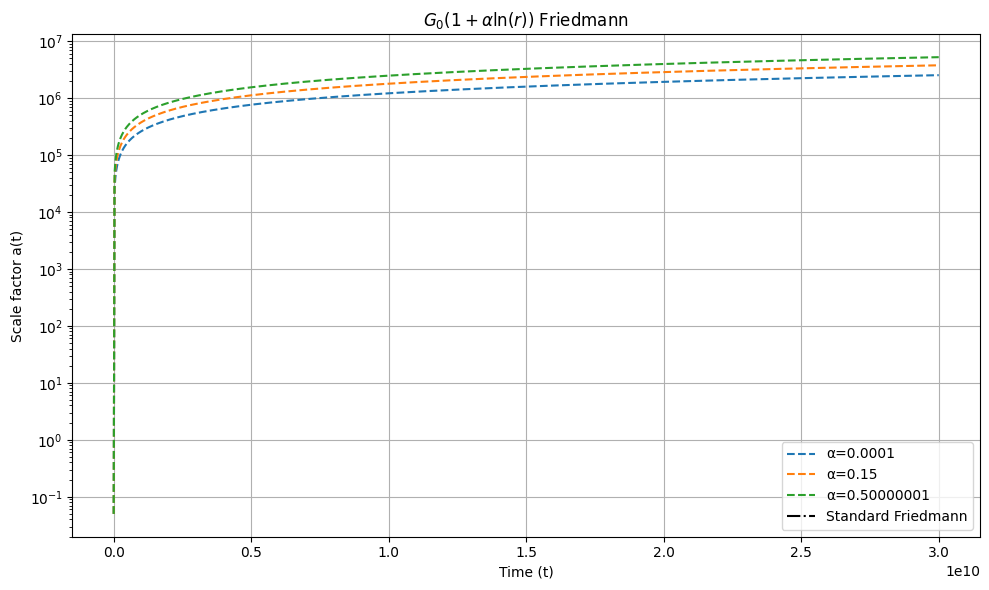

<Figure size 640x480 with 0 Axes>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


G_0 = 1
H_0 = 1 / 13.8
c = 3e9
Omega_0_m = 1.5
omega_r = 0.0
omega_lambda = 0.0
omega_0 = omega_lambda + omega_r + Omega_0_m

#Initial Conditions
t_i = 0.01
t_f = 30.0 *10**9
y_i = 0.05

#G* Functions with r Clamping
def func_0(r, a):
    r = np.maximum(r, 1e-5)
    return G_0 * a + G_0 * (a * np.log(r) + 1)

def func_1(r, a):
    r = np.maximum(r, 1e-5)
    term1 = G_0**2 * (a * np.log(r) + 1)**2
    bracket = (G_0**2 * a**2 * np.log(r)) / (2 * r**2) - (G_0**2 * a**2) / (4 * r**2) + (G_0**2 * a) / (2 * r**2)
    term2 = r**2 * bracket
    return term1 - term2

def func_2(r, a):
    r = np.maximum(r, 1e-5)
    term1 = G_0**2 * (a * np.log(r) + 1)**2
    bracket = (G_0**2 * a**2 * np.log(r)) / (3 * r**3) - (G_0**2 * a**2) / (9 * r**3) + (G_0**2 * a) / (3 * r**3)
    term2 = 2 * r**3 * bracket
    return term1 - term2


a_vals = [0.0001, 0.15, -0.2, 0.50000001, 0.9, 1.0]
colors = ['red', 'green', 'orange', 'purple', 'cyan', 'blue']

plt.figure(figsize=(10, 6))

for alpha in a_vals:
    try:
        def friedmann_rhs(t, r):
            r = np.maximum(r, 1e-5)
            expression = (
                (omega_0 * func_0(r, alpha)) / (r**3 * G_0) +
                (omega_0**2 * H_0**2 * func_1(r, alpha)**2) / (G_0 * r**6 * 2 * c**2) +
                (omega_0 * func_2(r, alpha)**2) / (G_0 * c**3 * r**3)
            )
            if np.any(expression < 0) or np.isnan(expression):
                raise ValueError(f"Invalid sqrt expression for α={alpha}: {expression}")
            return r * H_0 * np.sqrt(expression)

        sol = solve_ivp(
            friedmann_rhs,
            [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),
            method='LSODA', rtol=1e-5
        )
        plt.plot(sol.t, sol.y[0].flatten(), '--', label=f'α={alpha}')
    except Exception as e:
        print(f"⚠️ Skipping α={alpha}: {e}")

# --- Standard Friedmann Equation ---
sol_std = solve_ivp(
    lambda t, r: r * H_0 * (
        Omega_0_m / r**3 + (1 - Omega_0_m) / r**2 + omega_r / r**4 + omega_lambda
    )**0.5,
    [t_i, t_f], [y_i], t_eval=np.linspace(t_i, t_f, 1000),
    method='LSODA', rtol=1e-5
)
plt.plot(sol_std.t, sol_std.y[0].flatten(), '-.', color='black', label='Standard Friedmann')

# --- Final Plot Settings ---
plt.xlabel("Time (t)")
plt.ylabel("Scale factor a(t)")
plt.yscale('log')  # Use 'linear' if preferred
plt.title("$G_{0}(1+\\alpha \\ln(r))$ Friedmann")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('friedmann func_4.png')



---



---

